In [2]:
import pandas as pd
df = pd.read_csv('data/projects.csv')

# List of column names to drop
columns_to_drop = [col for col in df.columns if col.endswith('_ar')]

# Drop these columns
df.drop(columns=columns_to_drop, inplace=True)

# Show the updated DataFrame
print(df.head())

   project_id  project_number       project_name  developer_id  \
0         146             146             نيلوفر          54.0   
1         159             159          برج برايم          65.0   
2           8               8  جميرا بزنس سنتر 3           3.0   
3         227             227      إيليت ريزيدنس          99.0   
4         459             459          فو دو لاك   488437883.0   

   developer_number             developer_name  master_developer_id  \
0              54.0     دبي للعقارات (ش.ذ.م.م)                  850   
1              65.0   الخليج التجاري (ش.ذ.م.م)                  898   
2               3.0    مركز دبي للسلع المتعددة                  153   
3              99.0  اعمار العقارية (ش . م. ع)                  555   
4            1569.0    مركز دبي للسلع المتعددة                  153   

   master_developer_number      master_developer_name project_start_date  ...  \
0                      850     دبي للعقارات (ش.ذ.م.م)         19-02-2008  ...   
1             

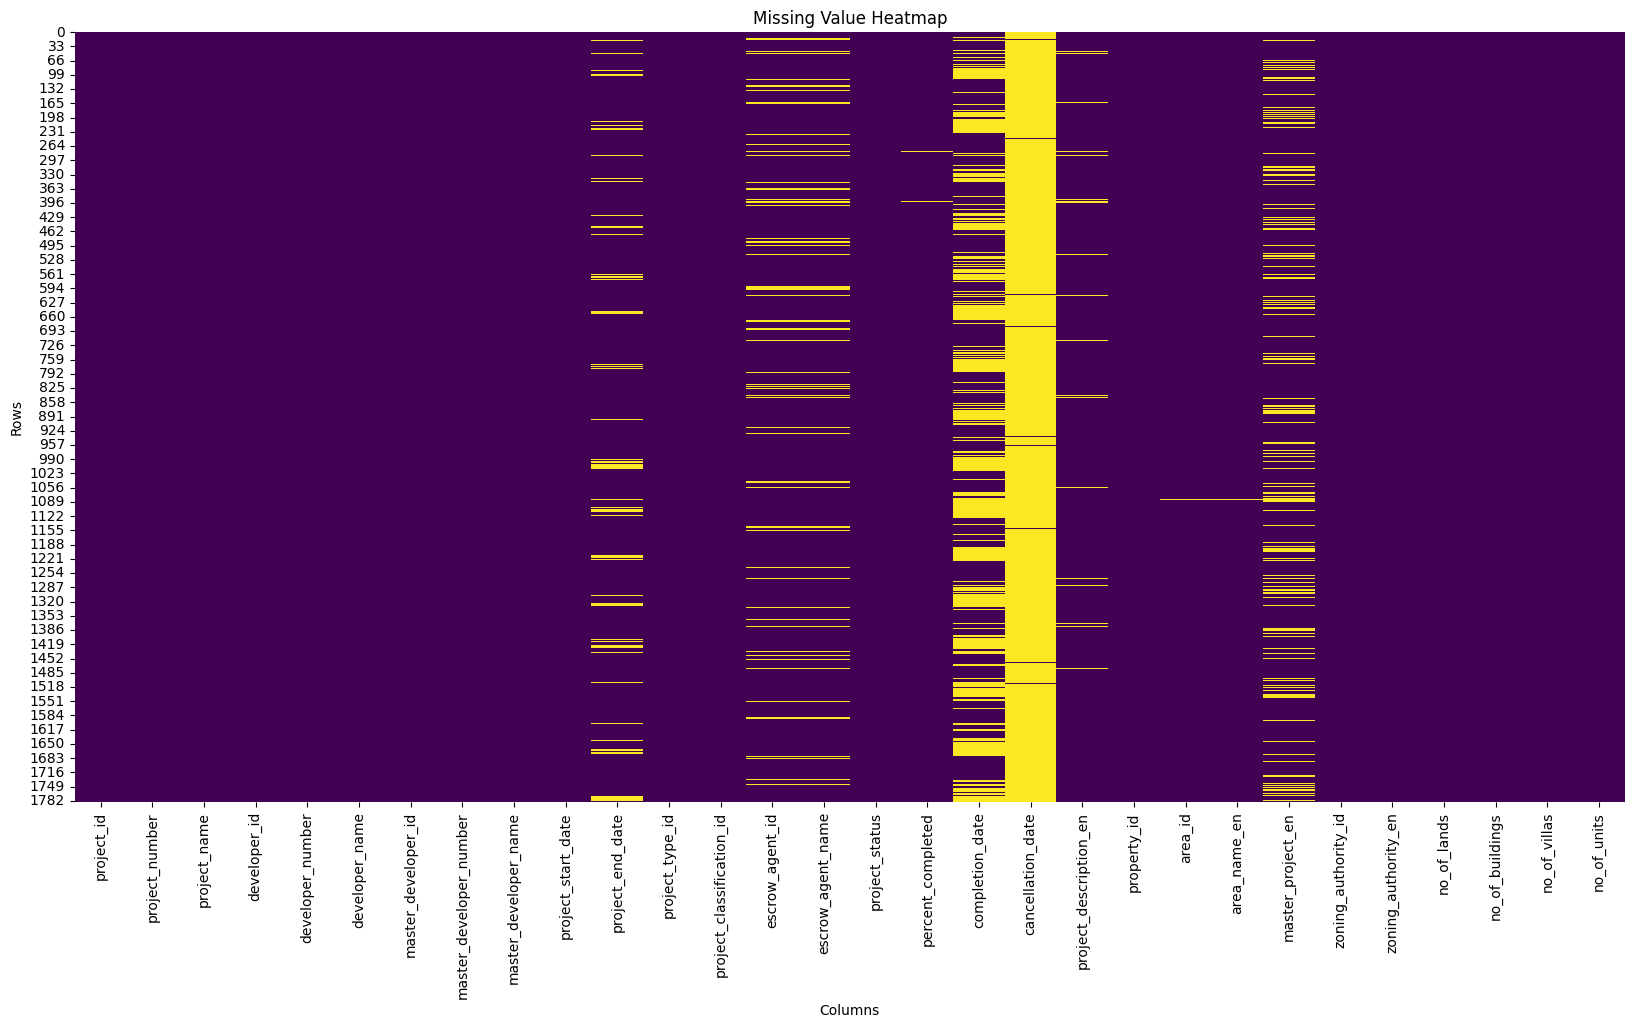

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your DataFrame
# df = pd.read_csv('data/Land_Registry.csv')

# Initialize plot
plt.figure(figsize=(20, 10))

# Create a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Add title and labels
plt.title('Missing Value Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show the plot
plt.show()


C:\Users\Alex\AppData\Local\Temp\ipykernel_25076\2826925146.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['project_start_date'] = pd.to_datetime(df['project_start_date'])


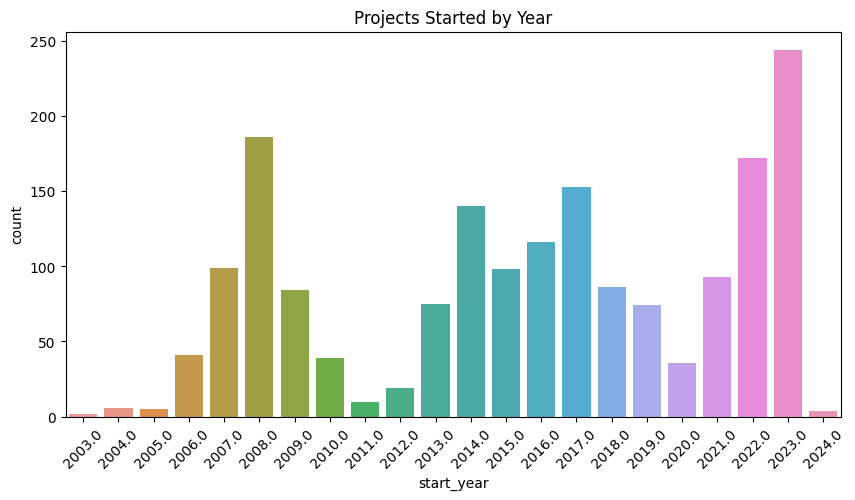

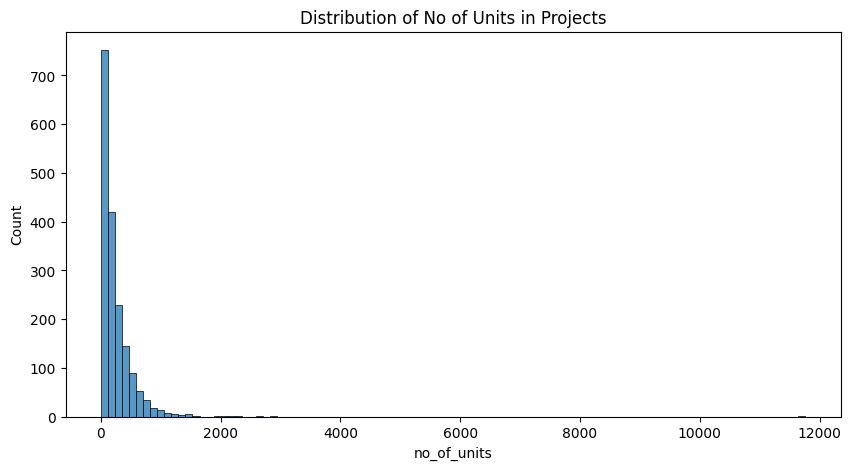

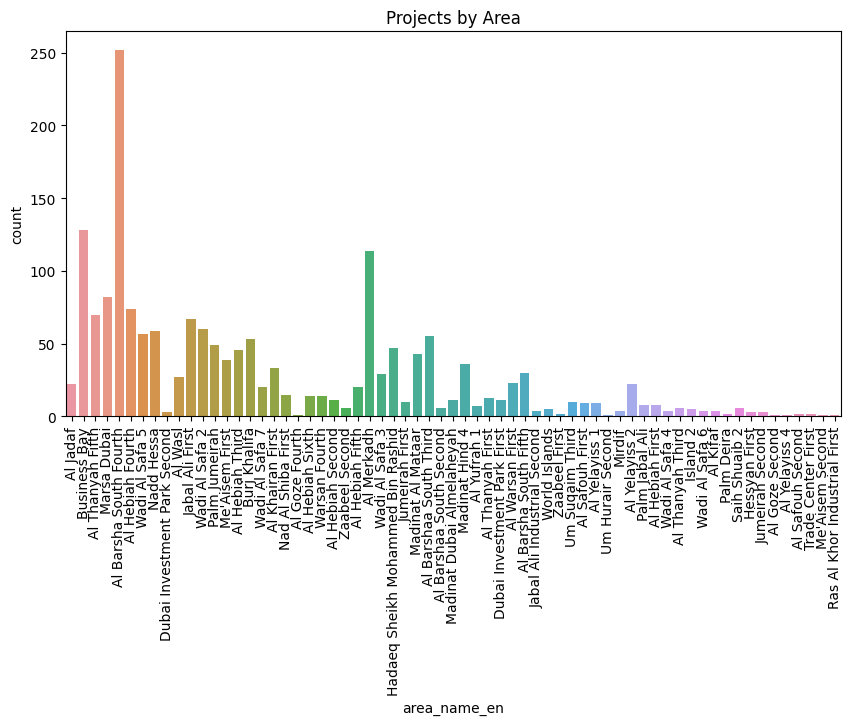

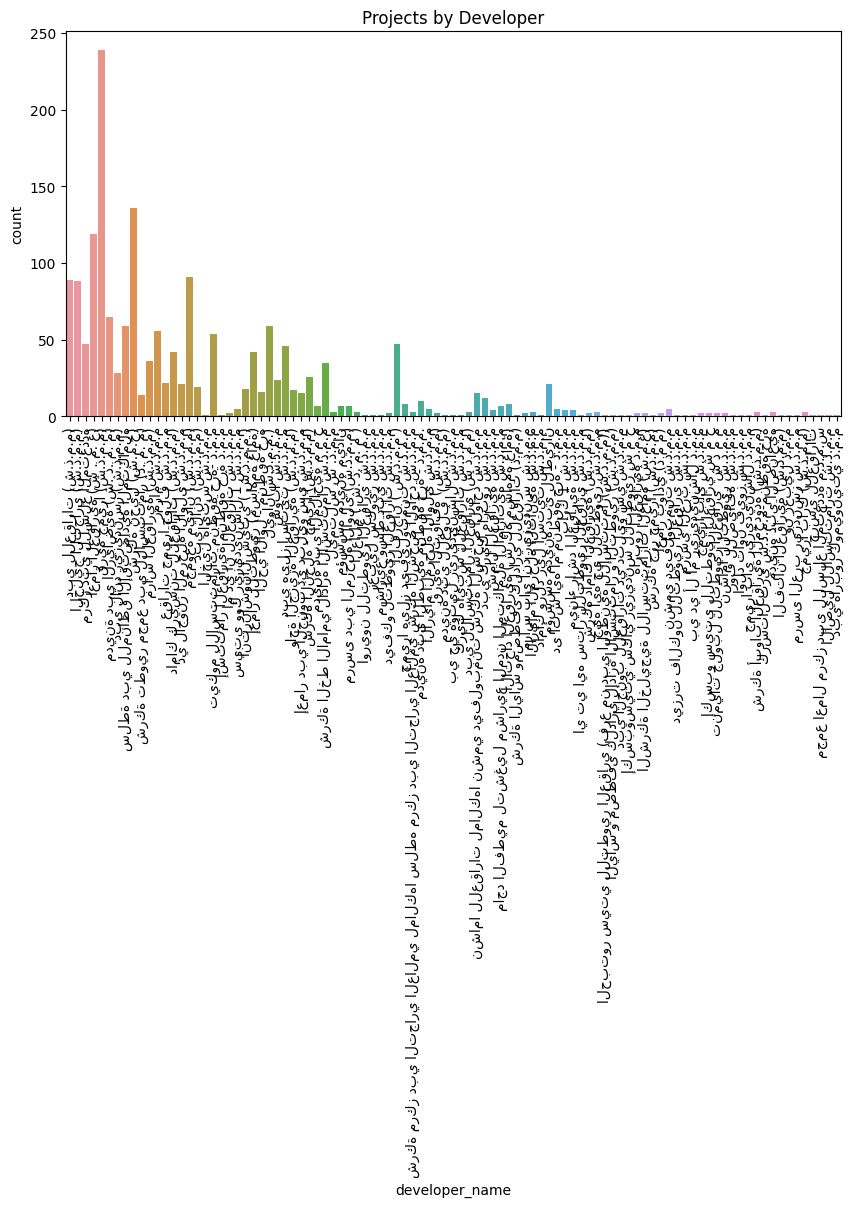

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
# df = pd.read_csv('your_project_dataset.csv')

# Convert 'project_start_date' to datetime and extract the year
df['project_start_date'] = pd.to_datetime(df['project_start_date'])
df['start_year'] = df['project_start_date'].dt.year

# 1. Projects by Year
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='start_year')
plt.title('Projects Started by Year')
plt.xticks(rotation=45)
plt.show()

# 2. Projects by No of Units
plt.figure(figsize=(10, 5))
sns.histplot(df['no_of_units'], bins=100, kde=False)
plt.title('Distribution of No of Units in Projects')
plt.show()

# 3. Projects by Area
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='area_name_en')
plt.title('Projects by Area')
plt.xticks(rotation=90)
plt.show()

# 4. Projects by Developer
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='developer_name')
plt.title('Projects by Developer')
plt.xticks(rotation=90)
plt.show()


C:\Users\Alex\AppData\Local\Temp\ipykernel_25076\4089875877.py:10: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['project_end_date'] = pd.to_datetime(df['project_end_date'])


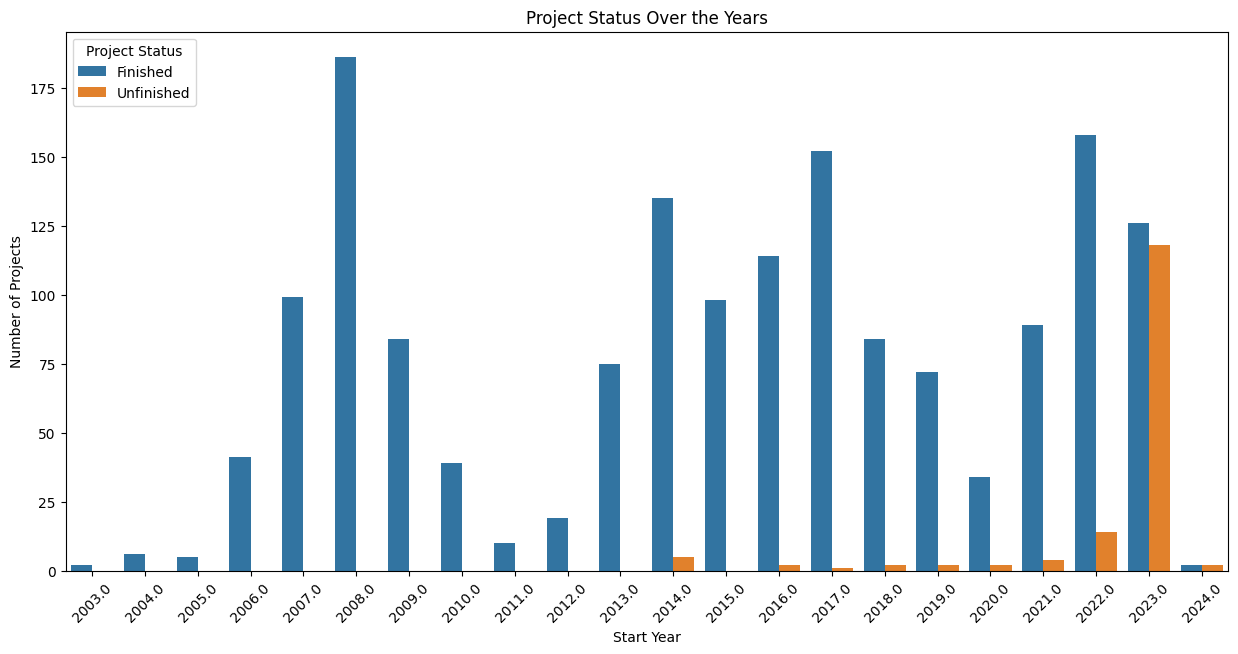

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
# df = pd.read_csv('your_project_dataset.csv')

# Convert 'project_start_date' and 'project_end_date' to datetime and extract the year
df['project_start_date'] = pd.to_datetime(df['project_start_date'])
df['project_end_date'] = pd.to_datetime(df['project_end_date'])

df['start_year'] = df['project_start_date'].dt.year
df['end_year'] = df['project_end_date'].dt.year

# Generate a column for project status
df['project_status'] = 'Unfinished'
df.loc[df['project_end_date'].notna(), 'project_status'] = 'Finished'

# Infographics on Project Status Over the Years
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='start_year', hue='project_status')
plt.title('Project Status Over the Years')
plt.xlabel('Start Year')
plt.ylabel('Number of Projects')
plt.legend(title='Project Status', loc='upper left')
plt.xticks(rotation=45)
plt.show()


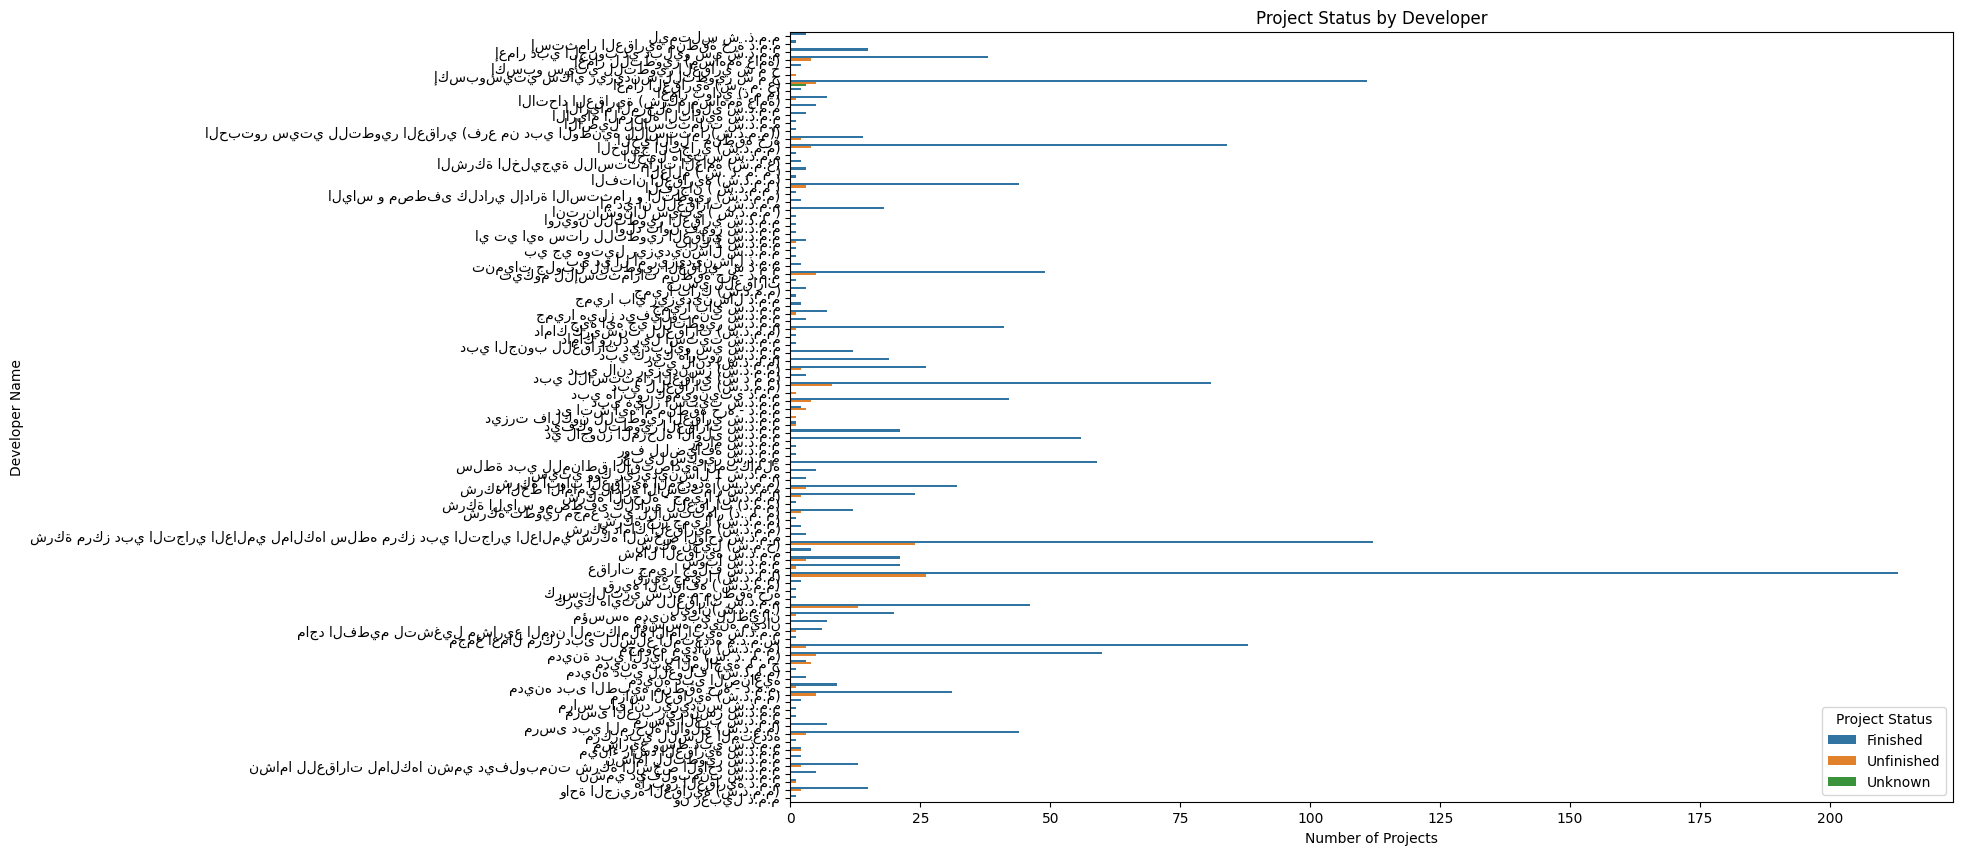

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Sample DataFrame
# df = pd.read_csv("your_dataset.csv")

# Assign project status based on conditions
conditions = [
    (pd.notna(df['project_start_date']) & pd.notna(df['project_end_date'])),
    (pd.notna(df['project_start_date']) & pd.isna(df['project_end_date']) & pd.isna(df['cancellation_date'])),
    (pd.notna(df['cancellation_date']))
]

choices = ['Finished', 'Unfinished', 'Cancelled']

df['project_status'] = np.select(conditions, choices, default='Unknown')

# Count the project statuses by each developer
status_by_developer = df.groupby(['developer_name', 'project_status']).size().reset_index(name='count')

# Create the plot
plt.figure(figsize=(15, 10))
sns.barplot(x='count', y='developer_name', hue='project_status', data=status_by_developer, orient='h')
plt.title('Project Status by Developer')
plt.xlabel('Number of Projects')
plt.ylabel('Developer Name')
plt.legend(title='Project Status')
plt.show()


C:\Users\Alex\AppData\Local\Temp\ipykernel_25076\2764405814.py:10: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['cancel_year'] = pd.to_datetime(df['cancellation_date']).dt.year


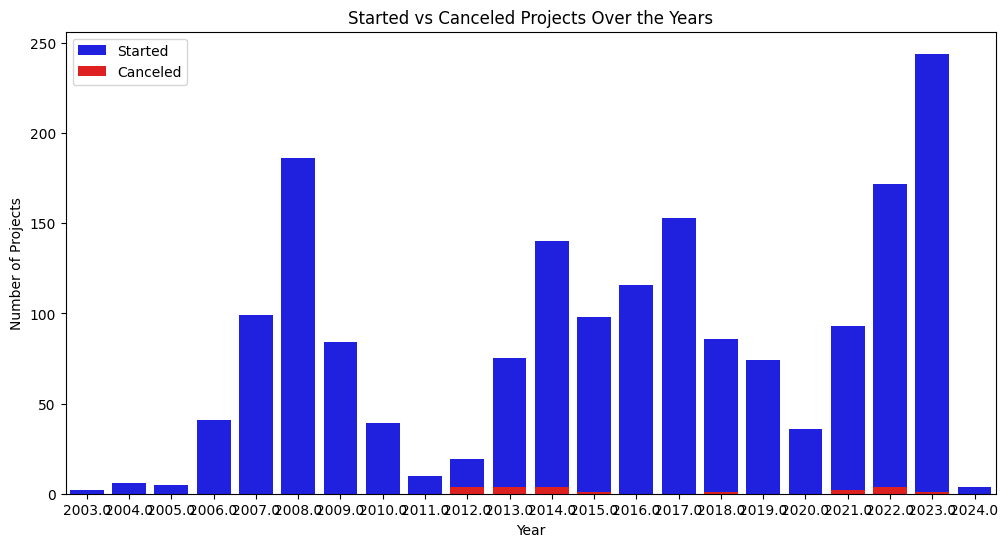

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame with 'start_date' and 'cancellation_date' columns
# df = pd.read_csv('your_file.csv')

# Extract the year from 'start_date' and 'cancellation_date'
df['start_year'] = pd.to_datetime(df['project_start_date']).dt.year
df['cancel_year'] = pd.to_datetime(df['cancellation_date']).dt.year

# Create DataFrames for started and canceled projects
started_projects = df['start_year'].value_counts().reset_index()
canceled_projects = df['cancel_year'].value_counts().reset_index()

# Rename columns for clarity
started_projects.columns = ['year', 'started_count']
canceled_projects.columns = ['year', 'canceled_count']

# Merge the counts into one DataFrame
project_counts = pd.merge(started_projects, canceled_projects, on='year', how='outer')

# Fill missing values with 0
project_counts.fillna(0, inplace=True)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(data=project_counts, x='year', y='started_count', color='blue', label='Started')
sns.barplot(data=project_counts, x='year', y='canceled_count', color='red', label='Canceled')
plt.title('Started vs Canceled Projects Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.legend()
plt.show()
